In [3]:
import matplotlib.pyplot as plt

import numpy as np

from zse.collections import *
from zse.utilities import *

In [2]:
f = open('crum_rings.txt','r')
alllines=f.readlines()
f.close()

In [4]:
def get_fw_data(file,code):
    file = open(file,'r')
    data = file.readlines()
    file.close()
    
    for i,line in enumerate(data):
        fields = line.split()
        if fields[0] == code:
            start = i
            break
    
    # go through fw chunk and get data
    
    t_sites = {}
    o_sites = {}
    for i,line in enumerate(data[start+1:]):
        line = line.rstrip(' \n')
        
        # check if the rings exist
        
#         if 'FAILED' in line or 'LARGE' in line:
#             return(False,False)
#         fields = line.split()
        
        # get the t site rings
        
        if 'T' in line and ':' in line:
            fields = line.split(':')
            t_sites[fields[0]]=fields[1]
#         for x in t_sites:
#             r = t_sites[x].split('_')
#             if len(r)>20:
#                 return(False,False)
                
        
        # get the o site rings
        if 'O' in line and ':' in line:
            fields = line.split(':')
            o_sites[fields[0]]=fields[1]
#         for x in o_sites:
#             r = o_sites[x]
#             if len(r)>20:
#                 return(False,False)
        
        
        
        fields = line.split()
        if fields[0] == 'Framework':
            end = i+start-1
            break

    return(t_sites,o_sites)    

In [26]:
file = 'goetzke_rings.txt'
fws = get_all_fws()
g_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            g_counts[x]+=1
print(g_counts)

[  0.   0.   0.  24. 237. 121. 229.   7. 193.  12. 141.   3. 145.   1.
  59.   2.  16.   0.  21.]


In [27]:
file = 'crum_rings.txt'
fws = get_all_fws()
c_counts = np.zeros(19)
for f in fws:
    tsites,osites = get_fw_data(file,f)
    frings = []
    for t in tsites:
        trings = tsites[t].split('_')
        frings += [int(x) for x in trings]
    frings = np.unique(frings)
    for x in frings:
        if x <=18:
            c_counts[x]+=1
print(c_counts)

[  0.   0.   0.  24. 237. 121. 224.   7. 154.  12.  85.   3. 109.   1.
  15.   2.   4.   0.   7.]


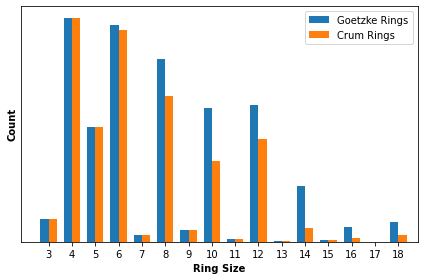

In [41]:
ring_sizes = np.arange(19)
width = 0.35
plt.bar(ring_sizes,g_counts,width,label='Goetzke Rings')
plt.bar(ring_sizes+width,c_counts,width,label='Crum Rings')
plt.xlim([2,19])
plt.xticks(np.arange(3,19)+width/2,np.arange(3,19))
plt.yticks([])
plt.ylabel('Count',weight='bold')
plt.xlabel('Ring Size',weight='bold')
plt.tight_layout()
plt.legend()
plt.savefig('../figures/completed-figures/ring-counts.pdf',dpi=300)
plt.show()